
**QUESTION 1**

PART 1
1.   (3*3*3 + 1) * 100 = 2800
2.   (3*3*100 + 1) * 200 = 180200
3.   (3*3*200 + 1) * 200 = 720400
4.   2800 + 180200 + 720400 = 903400







PART 2
1.   32 * 903400 * 0.000000125 = 3.6136



PART 3
1.   8 * 903400 * 0.00000125 = 0.9034




PART 4
1.   3.6136




**QUESTION 2**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import cross_val_score
from  tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = X_train/255
X_test = X_test/255
X_train, X_valid = X_train[:-5000], X_train[:-5000]
y_train, y_valid = y_train[:-5000], y_train[:-5000]

In [ ]:
X_train = X_train[...,np.newaxis]
X_valid = X_valid[...,np.newaxis]
X_test = X_test[...,np.newaxis]

In [ ]:
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (55000, 28, 28, 1)
y_train original shape (55000,)
X_test original shape (10000, 28, 28, 1)
y_test original shape (10000,)


In [ ]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [ ]:
def make_model():
     model = Sequential()
     model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
     model.add(BatchNormalization())
     model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
     model.add(BatchNormalization())
     model.add(MaxPooling2D())
     model.add(Dropout(0.25))

     model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
     model.add(BatchNormalization())
     model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
     model.add(BatchNormalization())
     model.add(MaxPooling2D())
     model.add(Dropout(0.25))

     model.add(Flatten())
     model.add(Dense(128, activation='relu'))
     model.add(BatchNormalization())
     model.add(Dropout(0.5))
     model.add(Dense(10, activation='softmax'))
     
     return model

model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                        

In [24]:
gen = ImageDataGenerator(rotation_range=5, width_shift_range=0.10, shear_range=0.5,
                         height_shift_range=0.10, zoom_range=0.10)

test_gen = ImageDataGenerator()

In [ ]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [ ]:
INIT_LR = 0.01  # initial learning rate
BATCH_SIZE = 64
EPOCHS = 10

s = tf.keras.backend.clear_session()  # clear default graph
model = make_model()

model.compile(
    loss='categorical_crossentropy',  
    optimizer=tf.keras.optimizers.Adamax(lr=INIT_LR),  
    metrics=['accuracy']  
)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


In [ ]:
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch

In [ ]:
class LrHistory(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", tf.keras.backend.get_value(model.optimizer.lr))

In [ ]:
history = model.fit(train_generator, epochs=EPOCHS, 
                    validation_data=test_generator, batch_size = BATCH_SIZE)

Epoch 1/10
860/860 [==============================] - 525s 610ms/step - loss: 0.1015 - accuracy: 0.9695 - val_loss: 0.0244 - val_accuracy: 0.9912
Epoch 2/10
860/860 [==============================] - 527s 613ms/step - loss: 0.0854 - accuracy: 0.9742 - val_loss: 0.0434 - val_accuracy: 0.9866
Epoch 3/10
860/860 [==============================] - 527s 613ms/step - loss: 0.0682 - accuracy: 0.9792 - val_loss: 0.0402 - val_accuracy: 0.9887
Epoch 4/10
860/860 [==============================] - 529s 615ms/step - loss: 0.0618 - accuracy: 0.9811 - val_loss: 0.0195 - val_accuracy: 0.9937
Epoch 5/10
860/860 [==============================] - 523s 608ms/step - loss: 0.0552 - accuracy: 0.9831 - val_loss: 0.0194 - val_accuracy: 0.9938
Epoch 6/10
860/860 [==============================] - 512s 595ms/step - loss: 0.0473 - accuracy: 0.9859 - val_loss: 0.0191 - val_accuracy: 0.9933
Epoch 7/10
860/860 [==============================] - 515s 599ms/step - loss: 0.0444 - accuracy: 0.9862 - val_loss: 0.0158 -

In [ ]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 22s 70ms/step - loss: 0.0154 - accuracy: 0.9950

Test accuracy:  0.9950000047683716


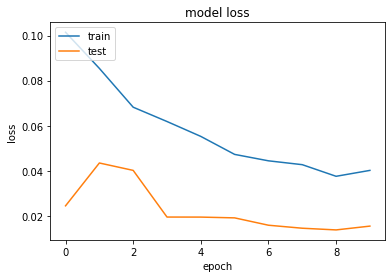

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()